# 10153_long

Team name: Team Ingvild <br>
Student id: 10153 <br>
Student name: Ingvild Unander Netland <br>
Challenge id: 1 <br>

## Import and split data

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# import xgboost
# import catboost
# import lightgbm
# import imblearn
# import lime
# import mlxtend
# import tsfresh
# import rpy2
# import graphviz
# import pydot

In [356]:
seed = 85822

### Import datasets and split into train and validation

In [357]:
train_total = pd.read_csv('./challenge1_train.csv')
train, validation = train_test_split(train_total, test_size = 0.1, random_state=seed)

train_X, train_Y = train.drop("target", axis=1), train["target"]
validation_X, validation_Y = validation.drop("target", axis=1), validation["target"]

test = pd.read_csv('./challenge1_test.csv')

## Baseline models

### Random guess baseline

In [358]:
random_clf = DummyClassifier(strategy='uniform', random_state=seed)
random_clf.fit(train_X, train_Y)
predictions = random_clf.predict(validation_X)
score = random_clf.score(validation_X, validation_Y)

print(score)     

0.5038


### Zero rule baseline
Always guess the most frequent label

In [359]:
zero_rule_clf = DummyClassifier(strategy='most_frequent', random_state=seed)
zero_rule_clf.fit(train_X, train_Y)
predictions = zero_rule_clf.predict(validation_X)
score = zero_rule_clf.score(validation_X, validation_Y)

print("Prediction score:", score) 

# See the actual number of different labels, to check that the score makes sense
print("\nValue counts:")
print(train_Y.value_counts())
print(validation_Y.value_counts())

Prediction score: 0.8194

Value counts:
0    36729
1     8271
Name: target, dtype: int64
0    4097
1     903
Name: target, dtype: int64


## Exploratory Data Analysis

We perform EDA to become familiar with the data to form hypotheses for feature engineering.

In [360]:
# See how the data looks
train.head()

,id,target,f0,f1,f2,f3,f4,f5,f6,f7,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
3716,3716,0,5d53aa722,0.0,7.1936,f,3.0,0.2,0.3,efc963815,...,29b2ef583,A,1.0,30.0,3.0,1.0,E,0.0,a5eef5d8b,00a7f9a05
18713,18713,0,NaN,0.0,6.9514,f,5.0,0.1,0.3,6c5596b19,...,e56aabe7b,NaN,3.0,NaN,3.0,2.0,D,0.0,5e348d538,8402256f6
45702,45702,0,NaN,0.0,6.9457,m,5.0,0.2,0.3,899f15109,...,637319ddc,Y,0.0,16.0,3.0,1.0,D,0.0,2db5a9486,580231f65
27755,27755,1,34eee9323,0.0,6.8278,n,4.0,0.2,0.3,0aad1d7ff,...,137e4dcfa,T,1.0,60.0,2.0,2.0,D,0.0,862d2fbff,41901460a
29653,29653,0,c81cb561d,0.0,6.9994,n,4.0,0.1,0.0,0c9065aa7,...,NaN,X,1.0,10.0,1.0,1.0,C,1.0,ca9ad1d4b,0304a1b60


In [361]:
# Check the shape of the different datasets

print("Total train shape: ", train_total.shape)
print("Train shape: ", train.shape)
print("Validation shape: ", validation.shape)
print("Test shape: ", test.shape)

Total train shape:  (50000, 27)
Train shape:  (45000, 27)
Validation shape:  (5000, 27)
Test shape:  (50000, 26)


In [362]:
# Check data types

print(train_total.dtypes)

id          int64
target      int64
f0         object
f1        float64
f2        float64
f3         object
f4        float64
f5        float64
f6        float64
f7         object
f8        float64
f9         object
f10       float64
f11       float64
f12       float64
f13       float64
f14        object
f15        object
f16        object
f17       float64
f18       float64
f19       float64
f20       float64
f21        object
f22       float64
f23        object
f24        object
dtype: object


The features of type "object" are considered to be a string, meaning we should consider converting them

In [363]:
# Look for missing data in the total train set (includes validation)

print(train_total.isnull().sum())

id           0
target       0
f0        1533
f1        1508
f2        1406
f3        1528
f4        1576
f5        1527
f6        1448
f7        1497
f8        1537
f9        1516
f10       1500
f11       1447
f12       1509
f13       1529
f14       1462
f15       1541
f16       1505
f17       1491
f18       1499
f19       1522
f20       1525
f21       1494
f22       1470
f23       1472
f24       1523
dtype: int64


There seems to be a stable amount of missing data for all features (between 1400 - 1600 values each)

### Analysis of the different features

#### F1

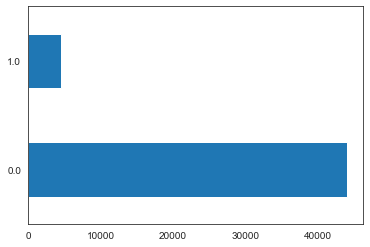

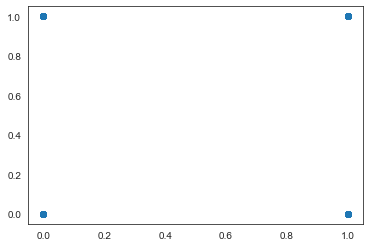

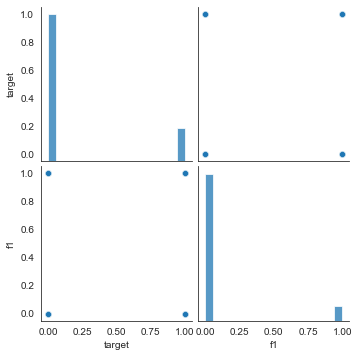

In [364]:
train_total.f1.value_counts().plot.barh()
plt.show()

plt.scatter(train_total.target, train_total.f1)
plt.show()

sns.pairplot(data = train_total, vars=["target", "f1"])
plt.show()

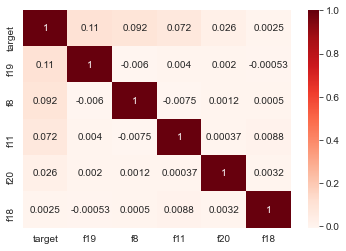

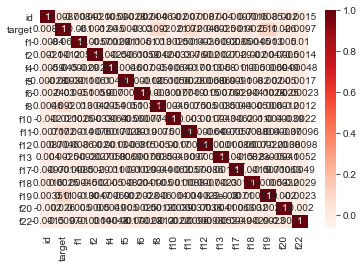

In [365]:
sns.heatmap(train_total[["target", "f19", "f8", "f11", "f20", "f18"]].corr(), annot=True, cmap = 'Reds')
plt.show()

sns.heatmap(train_total.corr(), annot=True, cmap = 'Reds')
plt.show()

7.4794


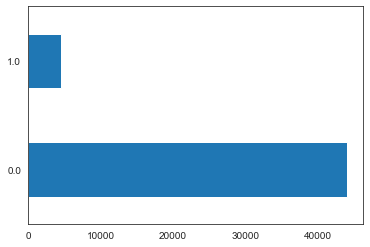

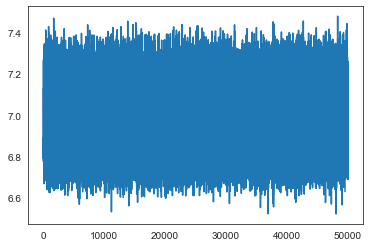

In [366]:
print(train_total.f2.max())

train_total.f1.value_counts().plot.barh()
plt.show()


plt.plot(train_total.f2)
plt.show()

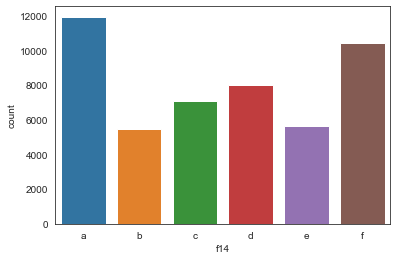

In [367]:
sns.countplot(x="f14", 
              data=train_total,
              order = ["a", "b", "c", "d", "e", "f"]
             )
plt.show()

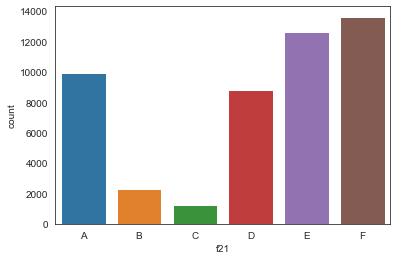

In [368]:
sns.countplot(x="f21", 
              data=train_total,
              order = ["A", "B", "C", "D", "E", "F"]
             )
plt.show()

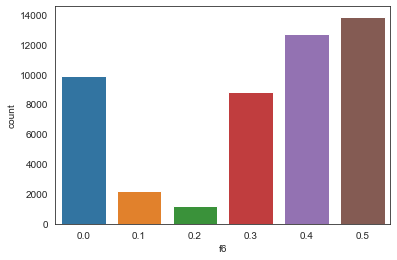

In [369]:
sns.countplot(x="f6", 
              data=train_total
             )
plt.show()

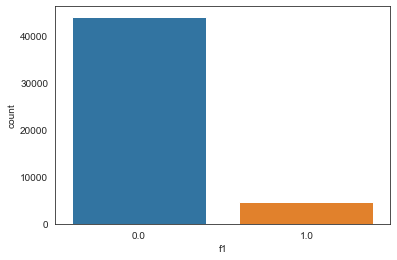

0.0    43965
1.0     4527
Name: f1, dtype: int64

In [370]:
sns.countplot(x="f1", 
              data=train_total
             )
plt.show()

train_total.f1.value_counts()

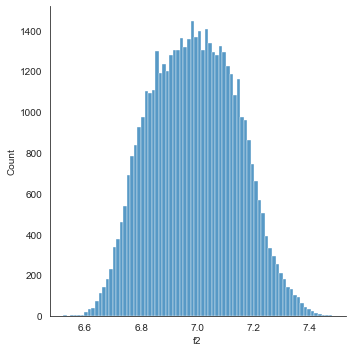

In [371]:
sns.displot(train_total, x="f2")
plt.show()

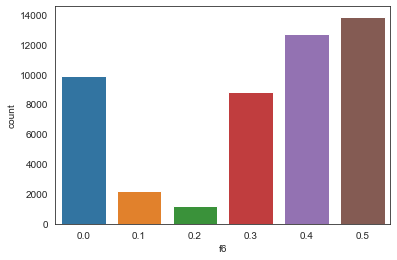

In [372]:
sns.countplot(x="f6", 
              data=train_total
             )
plt.show()

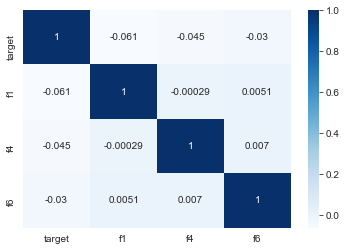

In [373]:
sns.heatmap(train_total[["target","f1", "f4", "f6"]].corr(), annot=True, cmap = 'Blues')
plt.show()

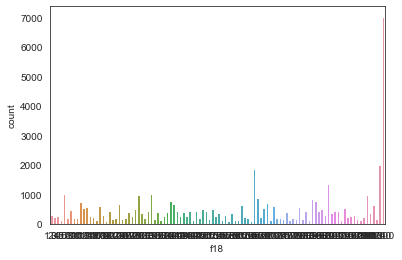

104.0    7016
103.0    1987
64.0     1862
87.0     1347
32.0     1020
         ... 
4.0       121
97.0      120
63.0      109
56.0      105
18.0       99
Name: f18, Length: 104, dtype: int64

In [374]:
sns.countplot(x="f18", 
              data=train_total
             )
plt.show()

train_total.f18.value_counts()

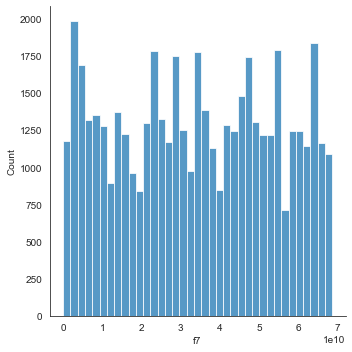

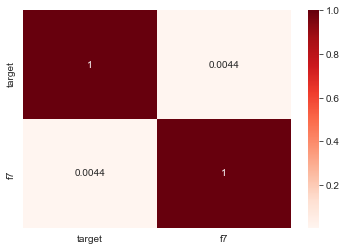

In [375]:
train_total.f7 = train_total.f7.astype(str).apply(lambda x: float.fromhex(x))

sns.displot(train_total.f7)
plt.show()

sns.heatmap(train_total[["target", "f7"]].corr(), annot=True, cmap = 'Reds')
plt.show()


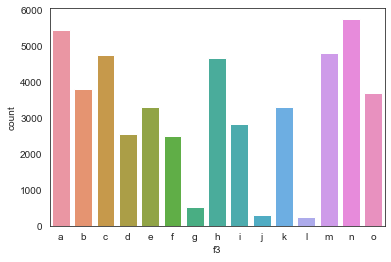

In [376]:
alphabet_order = [chr(i) for i in range(ord('a'),ord('o')+1)]

sns.countplot(x="f3", 
              data=train_total,
              order = alphabet_order
             )
plt.show()


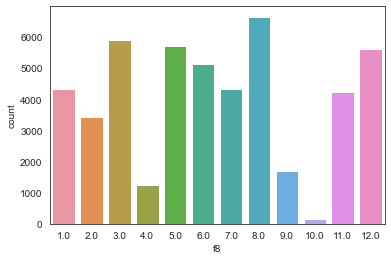

In [377]:
sns.countplot(x="f8", 
              data=train_total
             )
plt.show()

In [378]:
train_total.f9.value_counts()

Fl    900
DN    750
Sz    730
PS    474
vq    473
     ... 
MX     11
eA     11
Zv     10
gV      8
vQ      4
Name: f9, Length: 190, dtype: int64

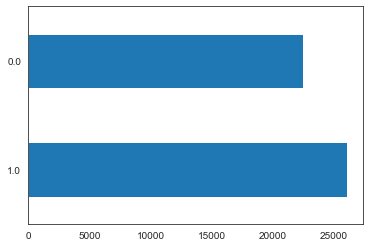

In [379]:
train_total.f10.value_counts().plot.barh()
plt.show()

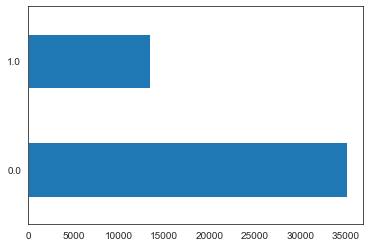

(50000, 27)


In [380]:
train_total.f11.value_counts().plot.barh()
plt.show()

print(train_total.shape)

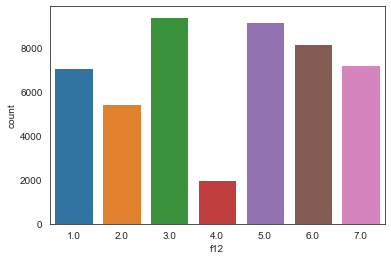

In [381]:
sns.countplot(x="f12", 
              data=train_total
             )
plt.show()


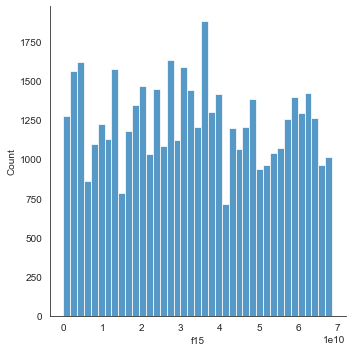

In [382]:
train_total.f15 = train_total.f15.astype(str).apply(lambda x: float.fromhex(x))

sns.displot(train_total.f15)
plt.show()


In [383]:
train_total.f0 = train_total.f0.astype(str).apply(lambda x: float.fromhex(x))

In [384]:
train_total.f23 = train_total.f23.astype(str).apply(lambda x: float.fromhex(x))
train_total.f24 = train_total.f24.astype(str).apply(lambda x: float.fromhex(x))

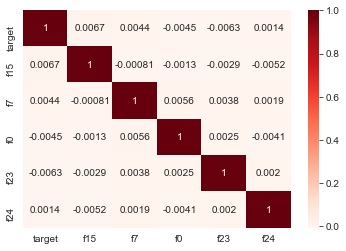

In [385]:

sns.heatmap(train_total[["target", "f15", "f7", "f0", "f23", "f24"]].corr(), annot=True, cmap = 'Reds')
plt.show()

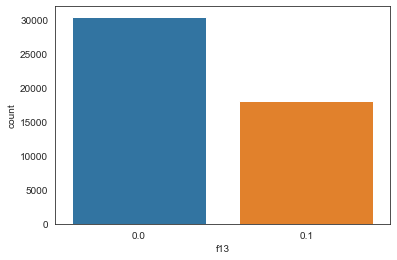

In [386]:
sns.countplot(x="f13", 
              data=train_total
             )
plt.show()

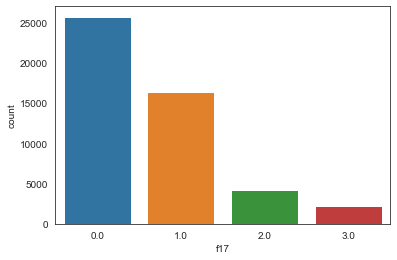

In [387]:
sns.countplot(x="f17", 
              data=train_total
             )
plt.show()

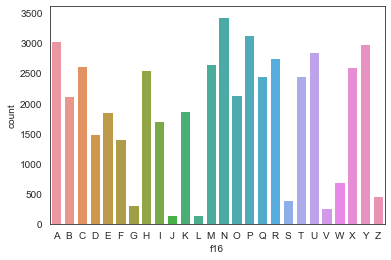

In [388]:
alphabet_order = [chr(i) for i in range(ord('A'),ord('Z')+1)]

sns.countplot(x="f16", 
              data=train_total,
              order = alphabet_order
             )
plt.show()

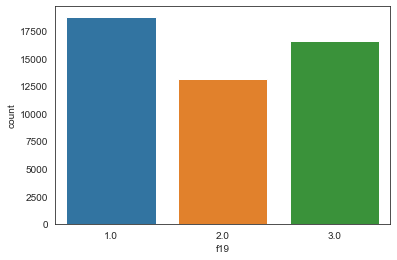

In [389]:
sns.countplot(x="f19", 
              data=train_total
             )
plt.show()

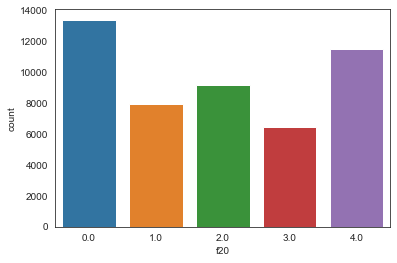

In [390]:
sns.countplot(x="f20", 
              data=train_total
             )
plt.show()

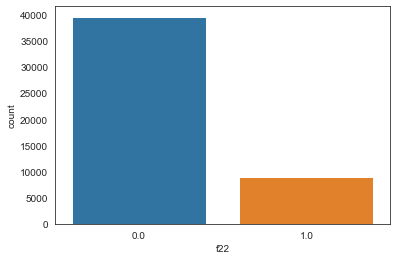

0.0    39614
1.0     8916
Name: f22, dtype: int64


In [391]:
sns.countplot(x="f22", 
              data=train_total
             )
plt.show()

print(train_total.f22.value_counts())

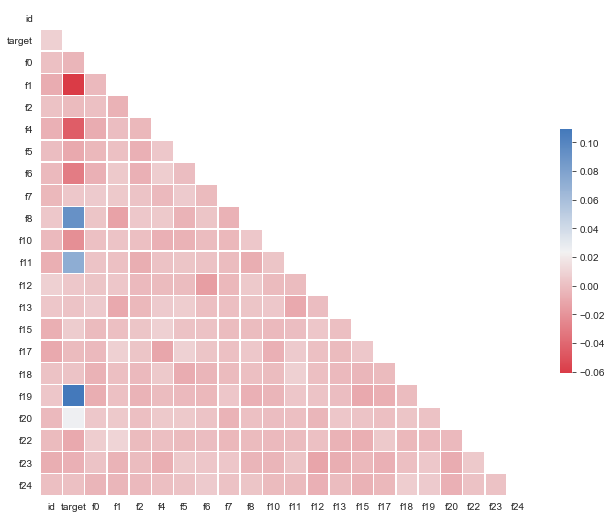

In [392]:
# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = train_total.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.show()

## Feature Engineering

Data preprocceing

- Analyse på både train og test?
- F14 karakterer? A - F
- Make into categorical?
- Same distribution but not correlated, = F4, F6, F21
- F0: Hex numbers
- F1: Binary (0 or 1)
- F2: Normal distribution (6.6 - 7.4 ish)
- F3: Letters between A - O, (15 classes)
- F4: The special distribution 5 classes, 0.0 - 5.0
- F5: Three values increasing in occurences(0.0, 0.1 and 0.2)
- F6: The special distribution 5 classes, 0.0 - 0.5
- F7: Hex numbers
- F8: Distribution of 12 classes (1-12), maybe a little similar to F3
- F9: Two letters, 190 types, but some of them appear often (e.g. Fl = 900 occurences)
- F10: Binary class of 0 or 1, similar number of both
- F11: Binary class of 0 or 1, mostly 0
- F12: Distribution of 7 classes
- F13: Binary class of 0.0 or 0.1, more 0 than 1
- F14: Distribution of 6 classes, letters from a-f
- F15: Hex numbers
- F16: Classes of the whole alphabet, A - Z (26 classes)
- F17: Four classes, 0.0 - 3.0
- F18: Numbers from 1.0 - 104.0, where 104.0 have over 7000 instances
- F19: Three classes, 1.0, 2.0 and 3.0, ish equal amount of each
- F20: Distribution of 5 classes, 0.0-4.0
- F21: The special distribution 5 classes, A - F
- F22: Binary class of 0 or 1, mostly 0
- F23: Hex numbers
- F24: Hex numbers

Todo:

- Save cleaned data to CSV
- Drop ID column

## Models

Show how hyperparameters are obtained (validation set)

In [405]:
# Try random forest

from sklearn.ensemble import RandomForestClassifier


# cat = pd.Categorical(train_total.f3)

# train_total.f3 = pd.get_dummies(cat)
train_total.drop(["id", "f3","f9","f14","f16","f21"], axis=1, inplace=True)


In [412]:
train_total.dropna()

train_X, train_Y = train_total.drop("target", axis=1), train_total["target"]

model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=seed)
model.fit(train_X, train_Y)

features = train_X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [400]:
print(train_total.f3.value_counts())

0    44557
1     5443
Name: f3, dtype: int64
